In [1]:
import sympy
from sympy import symbols, diff
import numpy as np
from scipy.linalg import solve
from sympy.solvers.solveset import linsolve
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import pandas as pd



# Задание №1.1

In [152]:
variable = input('Введите названия переменных: ').split()
func = input('Введите функцию f(x,y)=: ')
limit = input('Есть ли ограничения? 1-да/0 – нет: ')
if int(limit):
    limit_x = input(f'Введите допустимые интервалы по {variable[0]}: ').split()
    limit_y = input(f'Введите допустимые интервалы по {variable[1]}: ').split()

Введите названия переменных: x y
Введите функцию f(x,y)=: y*(x**2)+x*(y**3) - x*y
Есть ли ограничения? 1-да/0 – нет: 1
Введите допустимые интервалы по x: -0.1 0.1
Введите допустимые интервалы по y: -1 1


In [153]:
x, y = symbols(f'{variable[0]}, {variable[1]}')
dx = sympy.sympify(func).diff(x)
dy = sympy.sympify(func).diff(y)

points = sympy.solve([dx, dy], (x, y), manual=True)
ind = []

for i, el in enumerate(points):
    lst = list(el)
    try:
        if y in lst:
            lst[lst.index(y)] = 0
        if x in lst:
            lst[lst.index(x)] = 0
        points[i] = tuple(lst)
    except:
        continue


if int(limit):
    for i in range(len(points)):
        try:
            if not((float(limit_x[0]) <= points[i][0] <= float(limit_x[1])) and (float(limit_y[0]) <= points[i][1] <= float(limit_y[1]))):
                ind.append(i)
        except:
            continue
                
dxx = sympy.sympify(dx).diff(x)
dyy = sympy.sympify(dy).diff(y)
dxy = sympy.sympify(dx).diff(y)
dyx = sympy.sympify(dy).diff(x)

res_p = {}
res_p['max'] = []
res_p['min'] = []
res_p['required additional research'] = []
res_p['saddle'] = []
res_p['value f(x,y)'] = []

for i in range(len(points)):
    if i not in ind:
        dxx_n = dxx.subs([(x, points[i][0]), (y, points[i][1])]) 
        dyy_n = dyy.subs([(x, points[i][0]), (y, points[i][1])]) 
        dxy_n = dxy.subs([(x, points[i][0]), (y, points[i][1])]) 
        dyx_n = dyx.subs([(x, points[i][0]), (y, points[i][1])]) 
        res_p['value f(x,y)'].append(sympy.sympify(func).subs([(x, points[i][0]), (y, points[i][1])]))

        mat = sympy.Matrix([[dxx_n, dxy_n], [dyx_n, dyy_n]])
        d = mat.det()

        try:
            if dxx_n > 0 and d > 0:
                res_p['min'].append([points[i][0],points[i][1]])
            if dxx_n < 0 and d > 0:
                res_p['max'].append([points[i][0],points[i][1]])
            if (dxx_n < 0 and d < 0) or (dxx_n > 0 and d < 0) or (dxx_n == 0 and d != 0):
                res_p['saddle'].append([points[i][0],points[i][1]])
            if d == 0:
                res_p['required additional research'].append([points[i][0],points[i][1]])
        except:
            continue


<IPython.core.display.Javascript object>


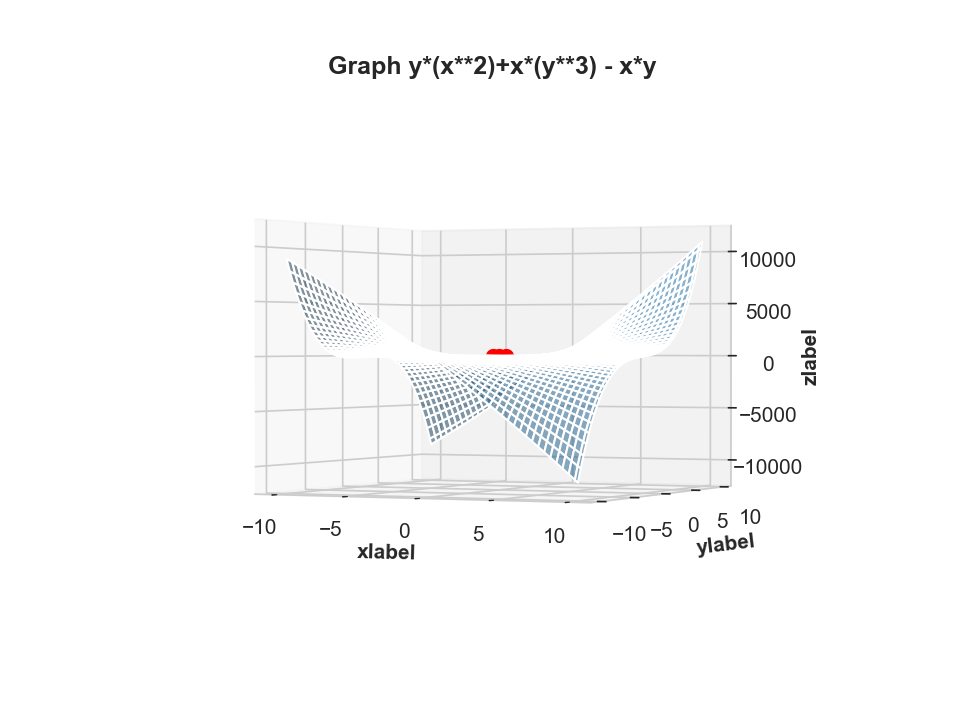

In [154]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sns.set_style("whitegrid", {'axes.grid' : False})

x_linsp = np.linspace(-10, 10, 100)
y_linsp = np.linspace(-10, 10, 100)
x_linsp, y_linsp = np.meshgrid(x_linsp, y_linsp)
z_linsp = sympy.lambdify(variable, func)(x_linsp, y_linsp)
plt.title(f"Graph {func}",fontweight="bold")
plt.xlabel("xlabel", fontweight="bold")
plt.ylabel("ylabel", fontweight="bold")
ax.set_zlabel('zlabel', fontweight="bold")


if res_p['max']:
    for i in range(len(res_p['max'])):
        x = res_p['max'][i][0]
        y = res_p['max'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p['min']:
    for i in range(len(res_p['min'])):
        x = res_p['min'][i][0]
        y = res_p['min'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p['saddle']:
    for i in range(len(res_p['saddle'])):
        x = res_p['saddle'][i][0]
        y = res_p['saddle'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p['required additional research']:
    for i in range(len(res_p['required additional research'])):
        x = res_p['required additional research'][i][0]
        y = res_p['required additional research'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)
        
        

ax.plot_surface(x_linsp, y_linsp, z_linsp, alpha=0.5)
ax._facecolors2d = ax._facecolor

plt.show()

In [155]:
res_p

{'max': [],
 'min': [],
 'required additional research': [],
 'saddle': [[0, -1], [0, 0], [0, 1]],
 'value f(x,y)': [0, 0, 0]}

# Задание №1.2

In [156]:
variable_2 = input('Введите названия переменных: ').split()
func_2 = input('Введите функцию f(x,y)=: ')
gunc = input('Введите ограничивающую функцию g(x,y,z)=0: ')
limit_2 = input('Есть ли ограничения? 1-да/0 – нет: ')
if int(limit_2):
    limit_2_x = input(f'Введите допустимые интервалы по {variable_2[0]}: ').split()
    limit_2_y = input(f'Введите допустимые интервалы по {variable_2[1]}: ').split()

Введите названия переменных: x y
Введите функцию f(x,y)=: x*y
Введите ограничивающую функцию g(x,y,z)=0: x**2+4*y**2-1
Есть ли ограничения? 1-да/0 – нет: 1
Введите допустимые интервалы по x: -10 10
Введите допустимые интервалы по y: -1 1


In [157]:
x, y = sympy.symbols(variable_2)
func_2 = sympy.sympify(func_2)
gunc = sympy.sympify(gunc)

l = sympy.Symbol('lambda')
l_f = func_2 + l*gunc
dx = sympy.sympify(l_f).diff(x)
dy = sympy.sympify(l_f).diff(y)
dl = sympy.sympify(l_f).diff(l)
dgx = sympy.sympify(gunc).diff(x)
dgy = sympy.sympify(gunc).diff(y)

points_2 = sympy.solve([dx, dy, dl], (x, y, l))
ind_2 = []

for i, el in enumerate(points_2):
    lst = list(el)
    try:
        if y in lst:
            lst[lst.index(y)] = 0
        if x in lst:
            lst[lst.index(x)] = 0
        points_2[i] = tuple(lst)
    except:
        continue

if int(limit_2):
    for i in range(len(points_2)):
        try:
            if not((float(limit_2_x[0]) <= points_2[i][0] <= float(limit_2_x[1])) and (float(limit_2_y[0]) <= points_2[i][1] <= float(limit_2_y[1]))):
                ind_2.append(i)
        except:
            continue
                
dxx = sympy.sympify(dx).diff(x)
dxy = sympy.sympify(dx).diff(y)
dyy = sympy.sympify(dy).diff(y)
dyx = sympy.sympify(dy).diff(x)

res_p_2 = {}
res_p_2['max'] = []
res_p_2['min'] = []
res_p_2['required additional research'] = []
res_p_2['saddle'] = []
res_p_2['value f(x,y)'] = []


for i in range(len(points_2)):
    if i not in ind_2:
        dxx_n = dxx.subs([(x, points_2[i][0]), (y, points_2[i][1]), (l, points_2[i][2])]) 
        dxy_n = dxy.subs([(x, points_2[i][0]), (y, points_2[i][1]), (l, points_2[i][2])])
        dyx_n = dyx.subs([(x, points_2[i][0]), (y, points_2[i][1]), (l, points_2[i][2])]) 
        dyy_n = dyy.subs([(x, points_2[i][0]), (y, points_2[i][1]), (l, points_2[i][2])])
        dgx_n = dgx.subs([(x, points_2[i][0]), (y, points_2[i][1])])
        dgy_n = dgy.subs([(x, points_2[i][0]), (y, points_2[i][1])])
        res_p_2['value f(x,y)'].append(sympy.sympify(func_2).subs([(x, points_2[i][0]), (y, points_2[i][1])]))


        mat = sympy.Matrix([[0, dgx_n, dgy_n], [dgx_n, dxx_n, dxy_n], [dgy_n,dyx_n,dyy_n]])
        d = mat.det()

        try:
            if dxx_n > 0 and d > 0:
                res_p_2['min'].append([points_2[i][0],points_2[i][1]])
            if dxx_n < 0 and d > 0:
                res_p_2['max'].append([points_2[i][0],points_2[i][1]])
            if (dxx_n < 0 and d < 0) or (dxx_n > 0 and d < 0) or (dxx_n == 0 and d != 0):
                res_p_2['saddle'].append([points_2[i][0],points_2[i][1]])
            if d == 0:
                res_p_2['required additional research'].append([points_2[i][0],points_2[i][1]])
        except:
            continue
    

<IPython.core.display.Javascript object>


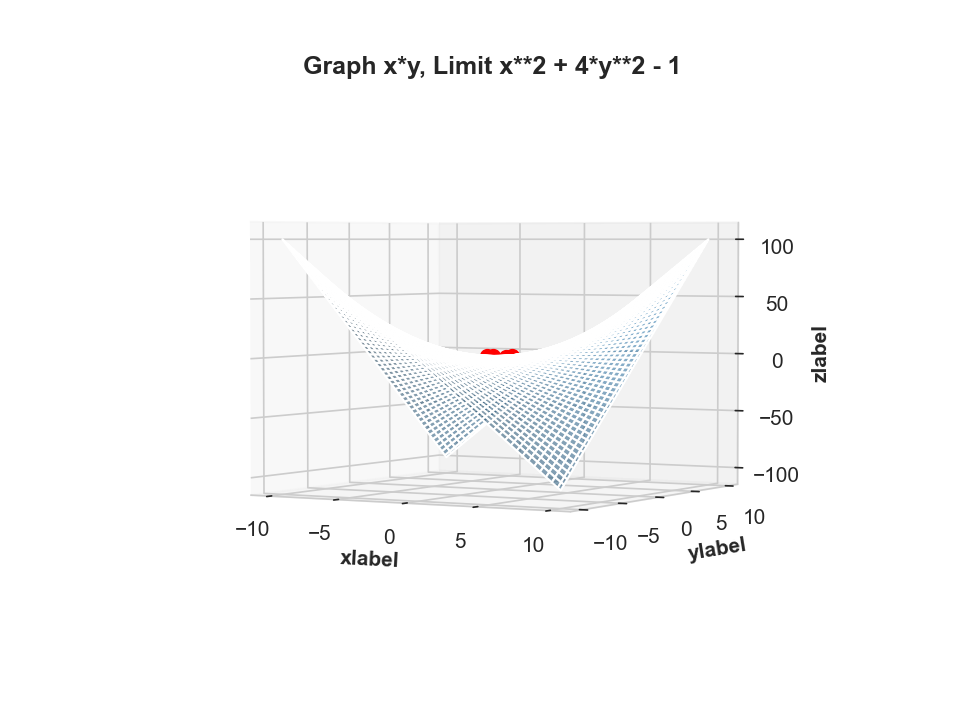

In [158]:
%matplotlib notebook
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
sns.set_style("whitegrid", {'axes.grid' : False})

x_linsp = np.linspace(-10, 10, 100)
y_linsp = np.linspace(-10, 10, 100)
x_linsp, y_linsp = np.meshgrid(x_linsp, y_linsp)
z_linsp = sympy.lambdify(variable_2, func_2)(x_linsp, y_linsp)
plt.title(f"Graph {func_2}, Limit {gunc}",fontweight="bold")
plt.xlabel("xlabel", fontweight="bold")
plt.ylabel("ylabel", fontweight="bold")
ax.set_zlabel('zlabel', fontweight="bold")



if res_p_2['max']:
    for i in range(len(res_p_2['max'])):
        x = res_p_2['max'][i][0]
        y = res_p_2['max'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p_2['min']:
    for i in range(len(res_p_2['min'])):
        x = res_p_2['min'][i][0]
        y = res_p_2['min'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p_2['saddle']:
    for i in range(len(res_p_2['saddle'])):
        x = res_p_2['saddle'][i][0]
        y = res_p_2['saddle'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)

if res_p_2['required additional research']:
    for i in range(len(res_p_2['required additional research'])):
        x = res_p_2['required additional research'][i][0]
        y = res_p_2['required additional research'][i][1]
        ax.scatter(x, y, c='red', s=40, alpha=1)
        
        

ax.plot_surface(x_linsp, y_linsp, z_linsp, alpha=0.5)
plt.show()

In [159]:
res_p_2

{'max': [[-sqrt(2)/2, -sqrt(2)/4], [sqrt(2)/2, sqrt(2)/4]],
 'min': [],
 'required additional research': [],
 'saddle': [[-sqrt(2)/2, sqrt(2)/4], [sqrt(2)/2, -sqrt(2)/4]],
 'value f(x,y)': [1/4, -1/4, -1/4, 1/4]}